In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Data Pre-processing

In [4]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
#Datatype of columns + checking for NA values. 
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(32561, 15)

In [6]:
# drop unnecessary columns
data=data.drop(columns= ['education','fnlwgt','relationship','native.country'])

In [7]:
# this column has '?' as one of the values, we need to deal with it (remove?)
data['workclass'].unique() 

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
# this column has '?' as one of the values, we need to deal with it (remove)
data['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [9]:
# replacing '?' with na values so that we can remove later.
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)

In [10]:
data.isnull().sum() # only 1800+1800 rows have 

age                  0
workclass         1836
education.num        0
marital.status       0
occupation        1843
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

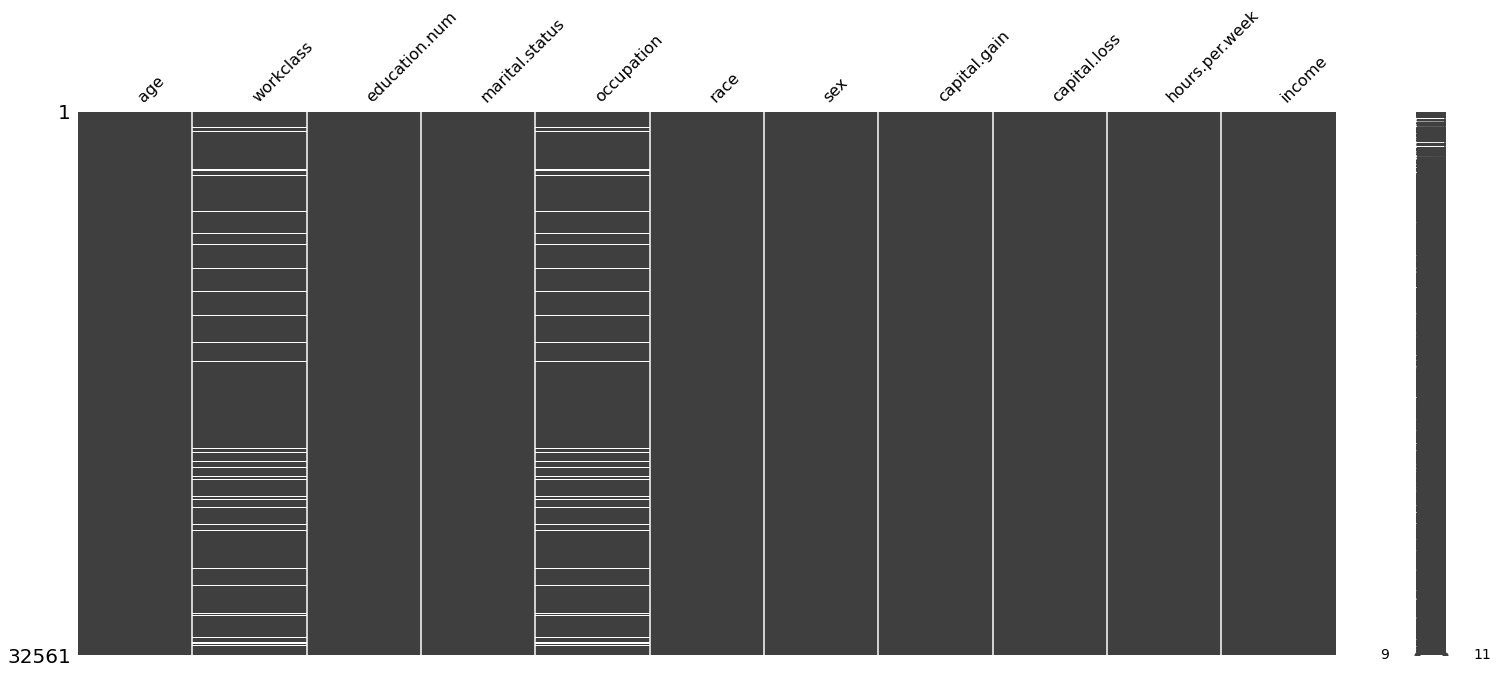

In [11]:
# visualize missing values
# The missing values are only in 2 columns and they mostly seem to overlap. So, we can remove them and not lose too much data. We remove them because occupation is an important column.
import missingno as msno 
msno.matrix(data) 

In [12]:
# drop duplicates - less than 30 rows
data.drop_duplicates(keep = 'first', inplace = True) 
data.shape

(27774, 11)

In [13]:
# remove na values
data=data.dropna()
data.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [14]:
data['workclass'] = np.where(data['workclass'] == 'State-gov' , 'gov', data['workclass'])
data['workclass'] = np.where(data['workclass'] == 'Federal-gov' , 'gov', data['workclass'])
data['workclass'] = np.where(data['workclass'] == 'Local-gov' , 'gov', data['workclass'])
data['workclass'] = np.where(data['workclass'] == 'Private' , 'Private', data['workclass'])
data['workclass'] = np.where(data['workclass'] == 'Self-emp-not-inc' , 'self', data['workclass'])
data['workclass'] = np.where(data['workclass'] == 'Self-emp-inc' , 'self', data['workclass'])
data['workclass'] = np.where(data['workclass'] == 'Without-pay' , 'unemployed', data['workclass'])
data.workclass.unique()

array(['Private', 'gov', 'self', 'unemployed'], dtype=object)

In [15]:
data['marital.status'] = np.where(data['marital.status'] == 'Widowed' , 'divorced/widowed/separated', data['marital.status'])
data['marital.status'] = np.where(data['marital.status'] == 'Divorced' , 'divorced/widowed/separated', data['marital.status'])
data['marital.status'] = np.where(data['marital.status'] == 'Separated' , 'divorced/widowed/separated', data['marital.status'])
data['marital.status'] = np.where(data['marital.status'] == 'Married-civ-spouse' , 'married', data['marital.status'])
data['marital.status'] = np.where(data['marital.status'] == 'Married-spouse-absent' , 'married', data['marital.status'])
data['marital.status'] = np.where(data['marital.status'] == 'Married-AF-spouse' , 'married', data['marital.status'])
data['marital.status'].nunique()

3

In [16]:
# checking attribute information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26193 entries, 1 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26193 non-null  int64 
 1   workclass       26193 non-null  object
 2   education.num   26193 non-null  int64 
 3   marital.status  26193 non-null  object
 4   occupation      26193 non-null  object
 5   race            26193 non-null  object
 6   sex             26193 non-null  object
 7   capital.gain    26193 non-null  int64 
 8   capital.loss    26193 non-null  int64 
 9   hours.per.week  26193 non-null  int64 
 10  income          26193 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.4+ MB


In [17]:
data['sex'].unique() 

array(['Female', 'Male'], dtype=object)

In [18]:
# making sex col numerical
data['sex']=data['sex'].replace('Female',0)
data['sex']=data['sex'].replace('Male',1)

In [19]:
#doing label encoding for categorical/object cols, namely, 'workclass', 'occupaion', 'marital.status' and 'race' 
# Example, in workclass column it changes:
# 'Exec-managerial' to 0,
# 'Machine-op-inspct' to 1,
# 'Prof-specialty' to 2 (and so on)

data['workclass'] = data.workclass.astype('category') 
data['occupation'] = data.occupation.astype('category')
data['occupation'] = data['occupation'].cat.codes
data['workclass'] = data['workclass'].cat.codes
data['marital.status'] = data['marital.status'].astype('category')
data['marital.status'] = data['marital.status'].cat.codes
data['race'] = data.workclass.astype('category')
data['race'] = data['race'].cat.codes


In [20]:
#We create separate dummy columns for 
data=pd.get_dummies(data,columns=['sex']) 
data=pd.get_dummies(data,columns=['marital.status']) 
data=pd.get_dummies(data,columns=['workclass']) 


In [21]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [22]:
# making income (class label) numerical
data['income']=data['income'].replace('<=50K',0) 
data['income']=data['income'].replace('>50K',1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26193 entries, 1 to 32559
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               26193 non-null  int64
 1   education.num     26193 non-null  int64
 2   occupation        26193 non-null  int8 
 3   race              26193 non-null  int8 
 4   capital.gain      26193 non-null  int64
 5   capital.loss      26193 non-null  int64
 6   hours.per.week    26193 non-null  int64
 7   income            26193 non-null  int64
 8   sex_0             26193 non-null  uint8
 9   sex_1             26193 non-null  uint8
 10  marital.status_0  26193 non-null  uint8
 11  marital.status_1  26193 non-null  uint8
 12  marital.status_2  26193 non-null  uint8
 13  workclass_0       26193 non-null  uint8
 14  workclass_1       26193 non-null  uint8
 15  workclass_2       26193 non-null  uint8
 16  workclass_3       26193 non-null  uint8
dtypes: int64(6), int8(2), uint8(9)


In [24]:
# normalizing using MinMaxScaler
from sklearn import preprocessing
colnames=list(data.columns.values)
x=data
min_max_scaler = preprocessing.MinMaxScaler()
val = min_max_scaler.fit_transform(x)
data = pd.DataFrame(val,columns=colnames)
data

,age,education.num,occupation,race,capital.gain,capital.loss,hours.per.week,income,sex_0,sex_1,marital.status_0,marital.status_1,marital.status_2,workclass_0,workclass_1,workclass_2,workclass_3
0,0.890411,0.533333,0.230769,0.0,0.0,1.000000,0.173469,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.506849,0.200000,0.461538,0.0,0.0,0.895317,0.397959,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.328767,0.600000,0.692308,0.0,0.0,0.895317,0.397959,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.232877,0.533333,0.538462,0.0,0.0,0.865473,0.448980,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.287671,0.333333,0.000000,0.0,0.0,0.865473,0.397959,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26188,0.205479,0.866667,0.923077,0.0,0.0,0.000000,0.102041,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
26189,0.493151,0.866667,0.230769,0.0,0.0,0.000000,0.397959,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
26190,0.068493,0.600000,0.769231,0.0,0.0,0.000000,0.397959,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
26191,0.136986,0.733333,0.923077,0.0,0.0,0.000000,0.377551,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [25]:
# checking the Dtypes of columns again
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26193 entries, 0 to 26192
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               26193 non-null  float64
 1   education.num     26193 non-null  float64
 2   occupation        26193 non-null  float64
 3   race              26193 non-null  float64
 4   capital.gain      26193 non-null  float64
 5   capital.loss      26193 non-null  float64
 6   hours.per.week    26193 non-null  float64
 7   income            26193 non-null  float64
 8   sex_0             26193 non-null  float64
 9   sex_1             26193 non-null  float64
 10  marital.status_0  26193 non-null  float64
 11  marital.status_1  26193 non-null  float64
 12  marital.status_2  26193 non-null  float64
 13  workclass_0       26193 non-null  float64
 14  workclass_1       26193 non-null  float64
 15  workclass_2       26193 non-null  float64
 16  workclass_3       26193 non-null  float6

(26193, 17)

In [26]:
# checking if balancing is required
data['income'].value_counts() 


0.0    19249
1.0     6944
Name: income, dtype: int64

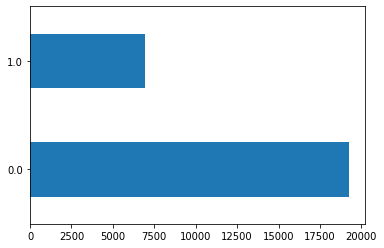

In [27]:
# visualising the values in 'income' column
count=pd.value_counts(data['income'].values)
count.plot.barh()


In [28]:
# storing data before downsampling.
data_imbalanced = data



In [29]:
# splitting into train and test
from sklearn.model_selection import train_test_split
Y = data['income']
X = data.drop(columns=['income'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
# X_combine=pd.concat(pd.dataX_train,y_train)

X_comb=pd.concat([X_train, y_train], axis=1, sort=False)
X_comb.columns

Index(['age', 'education.num', 'occupation', 'race', 'capital.gain',
       'capital.loss', 'hours.per.week', 'sex_0', 'sex_1', 'marital.status_0',
       'marital.status_1', 'marital.status_2', 'workclass_0', 'workclass_1',
       'workclass_2', 'workclass_3', 'income'],
      dtype='object')

In [30]:
X_comb['income'].value_counts()

0.0    15432
1.0     5522
Name: income, dtype: int64

In [31]:
# downsampling.
from sklearn.utils import resample

data_majority = X_comb[X_comb.income==0]
data_minority = X_comb[X_comb.income==1]
 
# Downsample majority class
data_majority_downsampled = resample(data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=6145,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
X_comb = pd.concat([data_majority_downsampled, data_minority])
 
# Display new class counts
X_comb.income.value_counts()

0.0    6145
1.0    5522
Name: income, dtype: int64

In [32]:
y_train = X_comb['income']
X_train = X_comb.drop(columns=['income'])

# Before balancing class label column

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

In [35]:
result_table1 = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [36]:
Y1 = data_imbalanced['income']
X1 = data_imbalanced.drop(columns=['income'])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, train_size=0.8, random_state=42)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(20954, 16)
(20954,)
(5239, 16)
(5239,)


In [37]:
lr = LogisticRegression(random_state=0, max_iter=1000).fit(X_train1, y_train1)

In [38]:
# yproba = lr.predict_proba(X_test)[::,1]
# fpr, tpr, _ = roc_curve(y_test,  yproba)
# auc = roc_auc_score(y_test, yproba)
# result_table = result_table.append({'classifiers':'Logistic Regression before resample',
#                                         'fpr':fpr, 
#                                         'tpr':tpr, 
#                                         'auc':auc}, ignore_index=True)
# result_table

In [39]:
yproba = lr.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  yproba)
auc = roc_auc_score(y_test1, yproba)
result_table1 = result_table1.append({'classifiers':'Logistic Regression before resample',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table1

,classifiers,fpr,tpr,auc
0,Logistic Regression before resample,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.035864978902953...",0.882813


In [40]:
print_score(lr, X_train1, X_test1, y_train1, y_test1, train=True) 

Train Result:

accuracy score: 0.8218

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88     15432
         1.0       0.71      0.55      0.62      5522

    accuracy                           0.82     20954
   macro avg       0.78      0.73      0.75     20954
weighted avg       0.81      0.82      0.81     20954


Confusion Matrix: 
 [[14185  1247]
 [ 2487  3035]]

ROC AUC: 0.7344

Average Accuracy: 	 0.8215
Accuracy SD: 		 0.0068


In [41]:
# We get an accuracy of 83.8% but the recall for 1 is 53% as opposed to 0's recall of 93%. This happens because of class imbalance.
print_score(lr, X_train1, X_test1, y_train1, y_test1, train=False) 

Test Result:

accuracy score: 0.8219

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      3817
         1.0       0.74      0.53      0.62      1422

    accuracy                           0.82      5239
   macro avg       0.79      0.73      0.75      5239
weighted avg       0.81      0.82      0.81      5239


Confusion Matrix: 
 [[3551  266]
 [ 667  755]]

ROC AUC: 0.7306



Bagging

In [42]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train1, y_train1)
#printing train scores.
print_score(dt1, X_train1, X_test1, y_train1, y_test1, train=True) 
print_score(dt1, X_train1, X_test1, y_train1, y_test1, train=False) 

Train Result:

accuracy score: 0.9727

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     15432
         1.0       0.99      0.90      0.95      5522

    accuracy                           0.97     20954
   macro avg       0.98      0.95      0.96     20954
weighted avg       0.97      0.97      0.97     20954


Confusion Matrix: 
 [[15399    33]
 [  539  4983]]

ROC AUC: 0.9501

Average Accuracy: 	 0.7841
Accuracy SD: 		 0.0075
Test Result:

accuracy score: 0.7830

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      3817
         1.0       0.61      0.57      0.59      1422

    accuracy                           0.78      5239
   macro avg       0.73      0.72      0.72      5239
weighted avg       0.78      0.78      0.78      5239


Confusion Matrix: 
 [[3288  529]
 [ 608  814]]

ROC AUC: 0.7169



In [43]:
yproba = dt1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  yproba)
auc = roc_auc_score(y_test1, yproba)
result_table1 = result_table1.append({'classifiers':'Decision Tree Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table1

,classifiers,fpr,tpr,auc
0,Logistic Regression before resample,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.035864978902953...",0.882813
1,Decision Tree Classifier,"[0.0, 0.13728058684831018, 0.13728058684831018...","[0.0, 0.569620253164557, 0.570323488045007, 0....",0.730195


In [44]:
# yproba = dt1.predict_proba(X_test)[::,1]
# fpr, tpr, _ = roc_curve(y_test,  yproba)
# auc = roc_auc_score(y_test, yproba)
# result_table1 = result_table1.append({'classifiers':'Logistic Regression before resample',
#                                         'fpr':fpr, 
#                                         'tpr':tpr, 
#                                         'auc':auc}, ignore_index=True)
# result_table1

In [45]:
# implementing  bagging
bag_clf1 = BaggingClassifier(base_estimator=dt1, n_estimators=200, bootstrap=True, oob_score=True, n_jobs=-1)
bag_clf1.fit(X_train1, y_train1)
print_score(bag_clf1,X_train1, X_test1, y_train1, y_test1, train=True)
print_score(bag_clf1,X_train1, X_test1, y_train1, y_test1, train=False)

Train Result:

accuracy score: 0.9727

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     15432
         1.0       0.96      0.94      0.95      5522

    accuracy                           0.97     20954
   macro avg       0.97      0.96      0.96     20954
weighted avg       0.97      0.97      0.97     20954


Confusion Matrix: 
 [[15210   222]
 [  350  5172]]

ROC AUC: 0.9611

Average Accuracy: 	 0.8167
Accuracy SD: 		 0.0046
Test Result:

accuracy score: 0.8135

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      3817
         1.0       0.68      0.59      0.63      1422

    accuracy                           0.81      5239
   macro avg       0.77      0.74      0.75      5239
weighted avg       0.81      0.81      0.81      5239


Confusion Matrix: 
 [[3423  394]
 [ 583  839]]

ROC AUC: 0.7434



In [46]:
yproba = bag_clf1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  yproba)
auc = roc_auc_score(y_test1, yproba)
result_table1 = result_table1.append({'classifiers':'Bagging Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table1

,classifiers,fpr,tpr,auc
0,Logistic Regression before resample,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.035864978902953...",0.882813
1,Decision Tree Classifier,"[0.0, 0.13728058684831018, 0.13728058684831018...","[0.0, 0.569620253164557, 0.570323488045007, 0....",0.730195
2,Bagging Classifier,"[0.0, 0.001047943411055803, 0.0015719151165837...","[0.0, 0.22925457102672292, 0.24120956399437413...",0.869529


Boosting

In [47]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
abc1 = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model1 = abc1.fit(X_train1, y_train1) #implementing 

#Predict the response for test dataset
y_pred = model1.predict(X_test1)
print_score(abc1, X_train1, X_test1, y_train1, y_test1, train=True)
print_score(abc1, X_train1, X_test1, y_train1, y_test1, train=False)

Train Result:

accuracy score: 0.8454

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     15432
         1.0       0.76      0.60      0.67      5522

    accuracy                           0.85     20954
   macro avg       0.81      0.77      0.79     20954
weighted avg       0.84      0.85      0.84     20954


Confusion Matrix: 
 [[14401  1031]
 [ 2208  3314]]

ROC AUC: 0.7667

Average Accuracy: 	 0.8453
Accuracy SD: 		 0.0037
Test Result:

accuracy score: 0.8404

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3817
         1.0       0.77      0.58      0.66      1422

    accuracy                           0.84      5239
   macro avg       0.82      0.76      0.78      5239
weighted avg       0.83      0.84      0.83      5239


Confusion Matrix: 
 [[3577  240]
 [ 596  826]]

ROC AUC: 0.7590



In [48]:
yproba = abc1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  yproba)
auc = roc_auc_score(y_test1, yproba)
result_table1 = result_table1.append({'classifiers':'AdaBoost Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table1

,classifiers,fpr,tpr,auc
0,Logistic Regression before resample,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.035864978902953...",0.882813
1,Decision Tree Classifier,"[0.0, 0.13728058684831018, 0.13728058684831018...","[0.0, 0.569620253164557, 0.570323488045007, 0....",0.730195
2,Bagging Classifier,"[0.0, 0.001047943411055803, 0.0015719151165837...","[0.0, 0.22925457102672292, 0.24120956399437413...",0.869529
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.004219409282700...",0.905212


In [49]:
# adaboost+random forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100,n_jobs=-1, max_depth = 6);

b_r_clf1 = AdaBoostClassifier(base_estimator=clf1,n_estimators=clf1.n_estimators) #using random forest obj as base classifier
b_r_clf1.fit(X_train1, y_train1)
print_score(b_r_clf1, X_train1, X_test1, y_train1, y_test1, train=True)
print_score(b_r_clf1, X_train1, X_test1, y_train1, y_test1, train=False)


Train Result:

accuracy score: 0.9152

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     15432
         1.0       0.87      0.80      0.83      5522

    accuracy                           0.92     20954
   macro avg       0.90      0.88      0.89     20954
weighted avg       0.91      0.92      0.91     20954


Confusion Matrix: 
 [[14774   658]
 [ 1118  4404]]

ROC AUC: 0.8774

Average Accuracy: 	 0.8439
Accuracy SD: 		 0.0057
Test Result:

accuracy score: 0.8425

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.90      3817
         1.0       0.75      0.63      0.68      1422

    accuracy                           0.84      5239
   macro avg       0.81      0.77      0.79      5239
weighted avg       0.84      0.84      0.84      5239


Confusion Matrix: 
 [[3525  292]
 [ 533  889]]

ROC AUC: 0.7743



In [50]:
yproba = b_r_clf1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  yproba)
auc = roc_auc_score(y_test1, yproba)
result_table1 = result_table1.append({'classifiers':'AdaBoost+Random Forest Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table1

,classifiers,fpr,tpr,auc
0,Logistic Regression before resample,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.035864978902953...",0.882813
1,Decision Tree Classifier,"[0.0, 0.13728058684831018, 0.13728058684831018...","[0.0, 0.569620253164557, 0.570323488045007, 0....",0.730195
2,Bagging Classifier,"[0.0, 0.001047943411055803, 0.0015719151165837...","[0.0, 0.22925457102672292, 0.24120956399437413...",0.869529
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.004219409282700...",0.905212
4,AdaBoost+Random Forest Classifier,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.053445850914205...",0.908980


In [51]:
# gradient boost
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train1, y_train1)
print_score(gbc1, X_train1, X_test1, y_train1, y_test1, train=True)
print_score(gbc1, X_train1, X_test1, y_train1, y_test1, train=False)


Train Result:

accuracy score: 0.8553

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     15432
         1.0       0.79      0.62      0.69      5522

    accuracy                           0.86     20954
   macro avg       0.83      0.78      0.80     20954
weighted avg       0.85      0.86      0.85     20954


Confusion Matrix: 
 [[14518   914]
 [ 2118  3404]]

ROC AUC: 0.7786

Average Accuracy: 	 0.8515
Accuracy SD: 		 0.0055
Test Result:

accuracy score: 0.8500

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3817
         1.0       0.80      0.60      0.68      1422

    accuracy                           0.85      5239
   macro avg       0.83      0.77      0.79      5239
weighted avg       0.85      0.85      0.84      5239


Confusion Matrix: 
 [[3603  214]
 [ 572  850]]

ROC AUC: 0.7708



In [52]:
yproba = gbc1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  yproba)
auc = roc_auc_score(y_test1, yproba)
result_table1 = result_table1.append({'classifiers':'Gradient Boosting Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table1

,classifiers,fpr,tpr,auc
0,Logistic Regression before resample,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.035864978902953...",0.882813
1,Decision Tree Classifier,"[0.0, 0.13728058684831018, 0.13728058684831018...","[0.0, 0.569620253164557, 0.570323488045007, 0....",0.730195
2,Bagging Classifier,"[0.0, 0.001047943411055803, 0.0015719151165837...","[0.0, 0.22925457102672292, 0.24120956399437413...",0.869529
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.004219409282700...",0.905212
4,AdaBoost+Random Forest Classifier,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.053445850914205...",0.908980
5,Gradient Boosting Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0007032348804500703, 0.004219409282700...",0.915696


In [53]:
# xgboost
import xgboost as xgb
xg_reg1 = xgb.XGBClassifier()
xg_reg1.fit(X_train1,y_train1)
print_score(xg_reg1, X_train1, X_test1, y_train1, y_test1, train=True)
print_score(xg_reg1, X_train1, X_test1, y_train1, y_test1, train=False)

Train Result:

accuracy score: 0.8530

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     15432
         1.0       0.79      0.60      0.68      5522

    accuracy                           0.85     20954
   macro avg       0.83      0.77      0.79     20954
weighted avg       0.85      0.85      0.85     20954


Confusion Matrix: 
 [[14572   860]
 [ 2220  3302]]

ROC AUC: 0.7711

Average Accuracy: 	 0.8496
Accuracy SD: 		 0.0048
Test Result:

accuracy score: 0.8500

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      3817
         1.0       0.81      0.59      0.68      1422

    accuracy                           0.85      5239
   macro avg       0.83      0.77      0.79      5239
weighted avg       0.85      0.85      0.84      5239


Confusion Matrix: 
 [[3616  201]
 [ 585  837]]

ROC AUC: 0.7680



In [54]:
yproba = xg_reg1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  yproba)
auc = roc_auc_score(y_test1, yproba)
result_table1 = result_table1.append({'classifiers':'XGBoost',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table1

,classifiers,fpr,tpr,auc
0,Logistic Regression before resample,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.035864978902953...",0.882813
1,Decision Tree Classifier,"[0.0, 0.13728058684831018, 0.13728058684831018...","[0.0, 0.569620253164557, 0.570323488045007, 0....",0.730195
2,Bagging Classifier,"[0.0, 0.001047943411055803, 0.0015719151165837...","[0.0, 0.22925457102672292, 0.24120956399437413...",0.869529
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.004219409282700...",0.905212
4,AdaBoost+Random Forest Classifier,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.053445850914205...",0.908980
5,Gradient Boosting Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0007032348804500703, 0.004219409282700...",0.915696
6,XGBoost,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0007032348804500703, 0.002109704641350...",0.915635


In [55]:
# stacking
# meta 
# xgboost + bagging
# lr
from sklearn.linear_model import LogisticRegression

train_pred11 = pd.DataFrame(xg_reg1.predict(X_train1))
test_pred11 = pd.DataFrame(xg_reg1.predict(X_test1))
train_pred22 = pd.DataFrame(bag_clf1.predict(X_train1))
test_pred22 = pd.DataFrame(bag_clf1.predict(X_test1))

st1 = pd.concat([train_pred11, train_pred22], axis=1)
st_test1 = pd.concat([test_pred11, test_pred22], axis=1)

model1 = LogisticRegression(random_state = 1)
model1.fit(st1, y_train1)

print_score(model1, st1, st_test1, y_train1, y_test1, train=True)
print_score(model1, st1, st_test1, y_train1, y_test1, train=False)


Train Result:

accuracy score: 0.9727

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     15432
         1.0       0.96      0.94      0.95      5522

    accuracy                           0.97     20954
   macro avg       0.97      0.96      0.96     20954
weighted avg       0.97      0.97      0.97     20954


Confusion Matrix: 
 [[15210   222]
 [  350  5172]]

ROC AUC: 0.9611

Average Accuracy: 	 0.9727
Accuracy SD: 		 0.0018
Test Result:

accuracy score: 0.8135

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      3817
         1.0       0.68      0.59      0.63      1422

    accuracy                           0.81      5239
   macro avg       0.77      0.74      0.75      5239
weighted avg       0.81      0.81      0.81      5239


Confusion Matrix: 
 [[3423  394]
 [ 583  839]]

ROC AUC: 0.7434



# Logistic Regression (after under-sampling)

In [56]:
lr = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)

In [57]:
yproba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
result_table = result_table.append({'classifiers':'Logistic Regression after resample',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression after resample,"[0.0, 0.0, 0.0, 0.0005239717055279015, 0.00052...","[0.0, 0.0007032348804500703, 0.030942334739803...",0.881293


In [58]:
print_score(lr, X_train, X_test, y_train, y_test, train=True) 

Train Result:

accuracy score: 0.7930

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      6145
         1.0       0.77      0.80      0.79      5522

    accuracy                           0.79     11667
   macro avg       0.79      0.79      0.79     11667
weighted avg       0.79      0.79      0.79     11667


Confusion Matrix: 
 [[4824 1321]
 [1094 4428]]

ROC AUC: 0.7935

Average Accuracy: 	 0.7923
Accuracy SD: 		 0.0121


In [59]:
print_score(lr, X_train, X_test, y_train, y_test, train=False) 

Test Result:

accuracy score: 0.7956

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      3817
         1.0       0.59      0.79      0.68      1422

    accuracy                           0.80      5239
   macro avg       0.75      0.79      0.76      5239
weighted avg       0.82      0.80      0.80      5239


Confusion Matrix: 
 [[3049  768]
 [ 303 1119]]

ROC AUC: 0.7929



# Bagging

implementing the base classifier, the decision tree.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [61]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
yproba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
result_table = result_table.append({'classifiers':'Decision Tree Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression after resample,"[0.0, 0.0, 0.0, 0.0005239717055279015, 0.00052...","[0.0, 0.0007032348804500703, 0.030942334739803...",0.881293
1,Decision Tree Classifier,"[0.0, 0.2213780455855384, 0.22347393240764998,...","[0.0, 0.6962025316455697, 0.69901547116737, 0....",0.749761


In [63]:
#printing train scores.
print_score(dt, X_train, X_test, y_train, y_test, train=True) 

Train Result:

accuracy score: 0.9777

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6145
         1.0       1.00      0.96      0.98      5522

    accuracy                           0.98     11667
   macro avg       0.98      0.98      0.98     11667
weighted avg       0.98      0.98      0.98     11667


Confusion Matrix: 
 [[6124   21]
 [ 239 5283]]

ROC AUC: 0.9767

Average Accuracy: 	 0.7364
Accuracy SD: 		 0.0072


In [64]:
print_score(dt, X_train, X_test, y_train, y_test, train=False) 

Test Result:

accuracy score: 0.7555

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      3817
         1.0       0.54      0.70      0.61      1422

    accuracy                           0.76      5239
   macro avg       0.71      0.74      0.72      5239
weighted avg       0.78      0.76      0.76      5239


Confusion Matrix: 
 [[2964  853]
 [ 428  994]]

ROC AUC: 0.7378



In [65]:
#implementing bagging
bag_clf = BaggingClassifier(base_estimator=dt, n_estimators=200, bootstrap=True, oob_score=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [66]:
yproba = bag_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
result_table = result_table.append({'classifiers':'Bagging Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression after resample,"[0.0, 0.0, 0.0, 0.0005239717055279015, 0.00052...","[0.0, 0.0007032348804500703, 0.030942334739803...",0.881293
1,Decision Tree Classifier,"[0.0, 0.2213780455855384, 0.22347393240764998,...","[0.0, 0.6962025316455697, 0.69901547116737, 0....",0.749761
2,Bagging Classifier,"[0.0, 0.002357872674875557, 0.0034058160859313...","[0.0, 0.24261603375527427, 0.26019690576652604...",0.878506


In [67]:
print_score(bag_clf,X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9777

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      6145
         1.0       0.97      0.98      0.98      5522

    accuracy                           0.98     11667
   macro avg       0.98      0.98      0.98     11667
weighted avg       0.98      0.98      0.98     11667


Confusion Matrix: 
 [[5986  159]
 [ 101 5421]]

ROC AUC: 0.9779

Average Accuracy: 	 0.7818
Accuracy SD: 		 0.0103


In [68]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.7977

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      3817
         1.0       0.60      0.76      0.67      1422

    accuracy                           0.80      5239
   macro avg       0.75      0.79      0.76      5239
weighted avg       0.82      0.80      0.80      5239


Confusion Matrix: 
 [[3093  724]
 [ 336 1086]]

ROC AUC: 0.7870



# Boosting

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train) #implementing 

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [71]:
yproba = abc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
result_table = result_table.append({'classifiers':'AdaBoost Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression after resample,"[0.0, 0.0, 0.0, 0.0005239717055279015, 0.00052...","[0.0, 0.0007032348804500703, 0.030942334739803...",0.881293
1,Decision Tree Classifier,"[0.0, 0.2213780455855384, 0.22347393240764998,...","[0.0, 0.6962025316455697, 0.69901547116737, 0....",0.749761
2,Bagging Classifier,"[0.0, 0.002357872674875557, 0.0034058160859313...","[0.0, 0.24261603375527427, 0.26019690576652604...",0.878506
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.009142053445850...",0.906800


In [72]:
print_score(abc, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8162

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      6145
         1.0       0.80      0.81      0.81      5522

    accuracy                           0.82     11667
   macro avg       0.82      0.82      0.82     11667
weighted avg       0.82      0.82      0.82     11667


Confusion Matrix: 
 [[5031 1114]
 [1030 4492]]

ROC AUC: 0.8161

Average Accuracy: 	 0.8128
Accuracy SD: 		 0.0069


In [73]:
print_score(abc, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8204

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      3817
         1.0       0.63      0.80      0.71      1422

    accuracy                           0.82      5239
   macro avg       0.78      0.81      0.79      5239
weighted avg       0.84      0.82      0.83      5239


Confusion Matrix: 
 [[3157  660]
 [ 281 1141]]

ROC AUC: 0.8147



AdaBoost + Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1, max_depth = 6);

b_r_clf = AdaBoostClassifier(base_estimator=clf,n_estimators=clf.n_estimators) #using random forest obj as base classifier
b_r_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                          

In [76]:
yproba = b_r_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
result_table = result_table.append({'classifiers':'AdaBoost + RFC',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression after resample,"[0.0, 0.0, 0.0, 0.0005239717055279015, 0.00052...","[0.0, 0.0007032348804500703, 0.030942334739803...",0.881293
1,Decision Tree Classifier,"[0.0, 0.2213780455855384, 0.22347393240764998,...","[0.0, 0.6962025316455697, 0.69901547116737, 0....",0.749761
2,Bagging Classifier,"[0.0, 0.002357872674875557, 0.0034058160859313...","[0.0, 0.24261603375527427, 0.26019690576652604...",0.878506
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.009142053445850...",0.906800
4,AdaBoost + RFC,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.026722925457102...",0.902578


In [77]:
print_score(b_r_clf, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.9281

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      6145
         1.0       0.90      0.95      0.93      5522

    accuracy                           0.93     11667
   macro avg       0.93      0.93      0.93     11667
weighted avg       0.93      0.93      0.93     11667


Confusion Matrix: 
 [[5573  572]
 [ 267 5255]]

ROC AUC: 0.9293

Average Accuracy: 	 0.8064
Accuracy SD: 		 0.0077


In [78]:
print_score(b_r_clf, X_train, X_test, y_train, y_test, train=False) 

Test Result:

accuracy score: 0.8175

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      3817
         1.0       0.62      0.82      0.71      1422

    accuracy                           0.82      5239
   macro avg       0.77      0.82      0.79      5239
weighted avg       0.84      0.82      0.82      5239


Confusion Matrix: 
 [[3114  703]
 [ 253 1169]]

ROC AUC: 0.8190



Gradient Boosting

In [79]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
yproba = gbc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
result_table = result_table.append({'classifiers':'Gradient Boosting Classifier',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression after resample,"[0.0, 0.0, 0.0, 0.0005239717055279015, 0.00052...","[0.0, 0.0007032348804500703, 0.030942334739803...",0.881293
1,Decision Tree Classifier,"[0.0, 0.2213780455855384, 0.22347393240764998,...","[0.0, 0.6962025316455697, 0.69901547116737, 0....",0.749761
2,Bagging Classifier,"[0.0, 0.002357872674875557, 0.0034058160859313...","[0.0, 0.24261603375527427, 0.26019690576652604...",0.878506
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.009142053445850...",0.906800
4,AdaBoost + RFC,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.026722925457102...",0.902578
5,Gradient Boosting Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...","[0.0, 0.0007032348804500703, 0.009142053445850...",0.914118


In [82]:
print_score(gbc, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8313

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      6145
         1.0       0.81      0.83      0.82      5522

    accuracy                           0.83     11667
   macro avg       0.83      0.83      0.83     11667
weighted avg       0.83      0.83      0.83     11667


Confusion Matrix: 
 [[5091 1054]
 [ 914 4608]]

ROC AUC: 0.8315

Average Accuracy: 	 0.8246
Accuracy SD: 		 0.0092


In [83]:
print_score(gbc, X_train, X_test, y_train, y_test, train=False)  

Test Result:

accuracy score: 0.8276

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      3817
         1.0       0.64      0.82      0.72      1422

    accuracy                           0.83      5239
   macro avg       0.78      0.83      0.80      5239
weighted avg       0.85      0.83      0.83      5239


Confusion Matrix: 
 [[3170  647]
 [ 256 1166]]

ROC AUC: 0.8252



XGBoost

In [84]:
import xgboost as xgb

In [85]:
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [86]:
yproba = xg_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)
result_table = result_table.append({'classifiers':'XGBoost',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
result_table

,classifiers,fpr,tpr,auc
0,Logistic Regression after resample,"[0.0, 0.0, 0.0, 0.0005239717055279015, 0.00052...","[0.0, 0.0007032348804500703, 0.030942334739803...",0.881293
1,Decision Tree Classifier,"[0.0, 0.2213780455855384, 0.22347393240764998,...","[0.0, 0.6962025316455697, 0.69901547116737, 0....",0.749761
2,Bagging Classifier,"[0.0, 0.002357872674875557, 0.0034058160859313...","[0.0, 0.24261603375527427, 0.26019690576652604...",0.878506
3,AdaBoost Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0014064697609001407, 0.009142053445850...",0.906800
4,AdaBoost + RFC,"[0.0, 0.0, 0.0, 0.00026198585276395077, 0.0002...","[0.0, 0.0007032348804500703, 0.026722925457102...",0.902578
5,Gradient Boosting Classifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...","[0.0, 0.0007032348804500703, 0.009142053445850...",0.914118
6,XGBoost,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0007032348804500703, 0.001406469760900...",0.915769


In [87]:
print_score(xg_reg, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8295

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.82      0.84      6145
         1.0       0.81      0.84      0.82      5522

    accuracy                           0.83     11667
   macro avg       0.83      0.83      0.83     11667
weighted avg       0.83      0.83      0.83     11667


Confusion Matrix: 
 [[5038 1107]
 [ 882 4640]]

ROC AUC: 0.8301

Average Accuracy: 	 0.8222
Accuracy SD: 		 0.0077


In [88]:

print_score(xg_reg, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8273

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.83      0.87      3817
         1.0       0.64      0.83      0.72      1422

    accuracy                           0.83      5239
   macro avg       0.78      0.83      0.80      5239
weighted avg       0.85      0.83      0.83      5239


Confusion Matrix: 
 [[3151  666]
 [ 239 1183]]

ROC AUC: 0.8287



# Stacking

Meta classifier

In [93]:
# train_pred1
import xgboost as xgb
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)
train_pred1 = pd.DataFrame(xg_reg.predict(X_train))
test_pred1 = pd.DataFrame(xg_reg.predict(X_test))

In [94]:
#model - bagging
train_pred2 = pd.DataFrame(bag_clf.predict(X_train))
test_pred2 = pd.DataFrame(bag_clf.predict(X_test))

In [96]:
from sklearn.linear_model import LogisticRegression

st = pd.concat([train_pred1, train_pred2], axis=1)
st_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state = 1)
model.fit(st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
print_score(model, st, st_test, y_train, y_test, train=True)


Train Result:

accuracy score: 0.9777

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      6145
         1.0       0.97      0.98      0.98      5522

    accuracy                           0.98     11667
   macro avg       0.98      0.98      0.98     11667
weighted avg       0.98      0.98      0.98     11667


Confusion Matrix: 
 [[5986  159]
 [ 101 5421]]

ROC AUC: 0.9779

Average Accuracy: 	 0.9777
Accuracy SD: 		 0.0039


In [99]:
print_score(model, st , st_test, y_train, y_test, train=False) # test result accuracy of 0.78 

Test Result:

accuracy score: 0.7977

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      3817
         1.0       0.60      0.76      0.67      1422

    accuracy                           0.80      5239
   macro avg       0.75      0.79      0.76      5239
weighted avg       0.82      0.80      0.80      5239


Confusion Matrix: 
 [[3093  724]
 [ 336 1086]]

ROC AUC: 0.7870



# ROC

In [100]:
import matplotlib.pyplot as plt

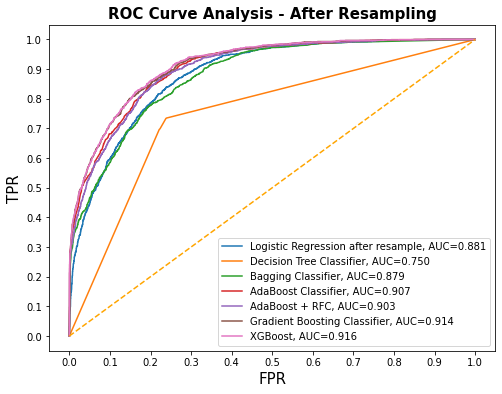

In [106]:

#result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("FPR", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("TPR", fontsize=15)

plt.title('ROC Curve Analysis - After Resampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [102]:
# fig.savefig('roc_curve_after_resampling.png')

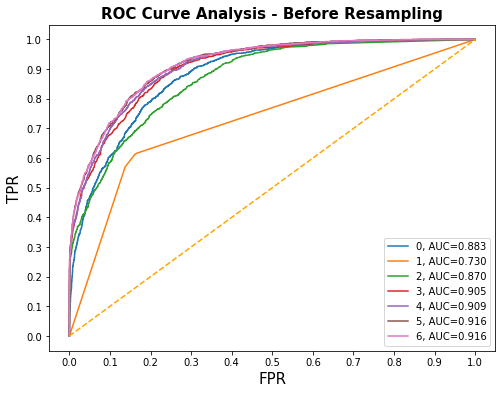

In [103]:
# result_table1.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table1.index:
    plt.plot(result_table1.loc[i]['fpr'], 
             result_table1.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table1.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("FPR", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("TPR", fontsize=15)

plt.title('ROC Curve Analysis - Before Resampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
